# ⛳**Midterm Assignement**

## 📚Libraries and Global Parameters

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parametric Method (Linear Regression)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, LeaveOneOut, cross_val_predict

# Non Parametric Method (KNN)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler

# Data Analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For Data Preparation
from sklearn.model_selection import train_test_split

# Data Diagnostic
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Polynomial Fitting
from sklearn.preprocessing import PolynomialFeatures

# Feature Selection Automation
from itertools import combinations

## 📂Upload Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_ch.csv to test_ch.csv
Saving train_ch.csv to train_ch.csv


## 💾Load Data


In [ ]:
train_data = pd.read_csv('/content/train_ch.csv')
test_data = pd.read_csv('/content/test_ch.csv')

## 📊**Data Analysis**

### Train Data Analysis


Summary Statistics:
        Unnamed: 0           v1           v2           v3           v4  \
count  1100.000000  1100.000000  1100.000000  1100.000000  1100.000000   
mean    550.500000     1.259466     1.136019    40.118540     1.154699   
std     317.686953    25.637907     0.083104     5.803070     0.087304   
min       1.000000     0.000239     1.000093    30.089582     1.000115   
25%     275.750000     0.224781     1.061930    35.206773     1.079127   
50%     550.500000     0.480495     1.134578    40.111728     1.157264   
75%     825.250000     0.743942     1.207314    45.290146     1.233314   
max    1100.000000   850.744002     1.283949    49.982712     1.299949   

                v5           v6           v7           v8           v9  \
count  1100.000000  1100.000000  1100.000000  1100.000000  1100.000000   
mean      3.972878     0.049715    38.922786     2.239802     1.552039   
std       0.586971     0.028969    25.268958    24.532841    34.202316   
min       2.9986

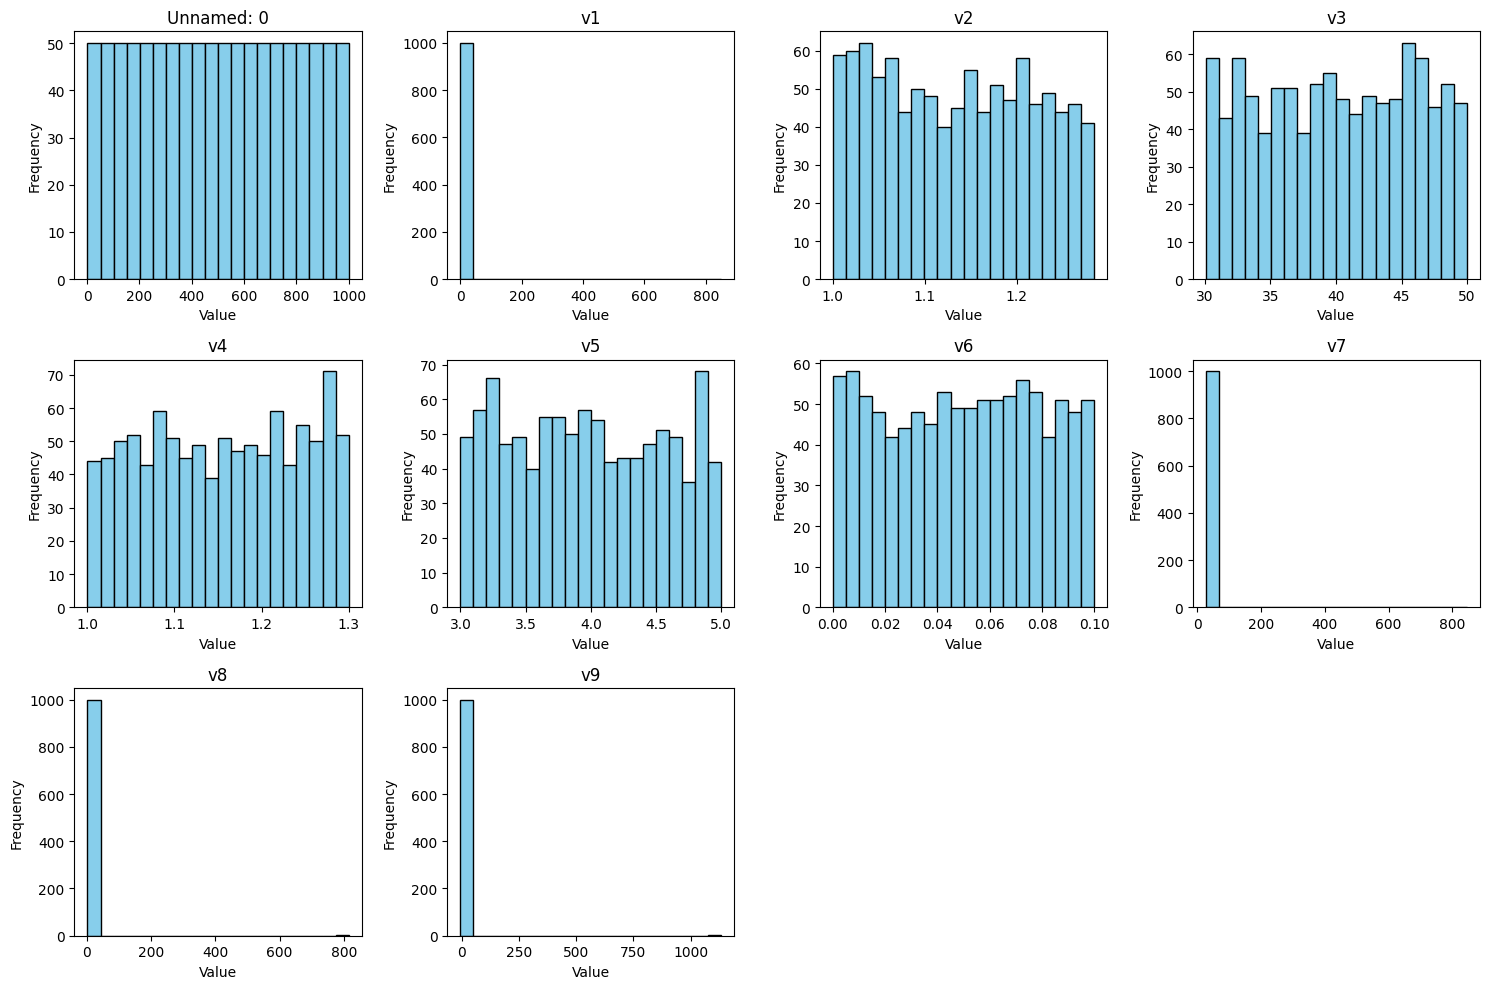

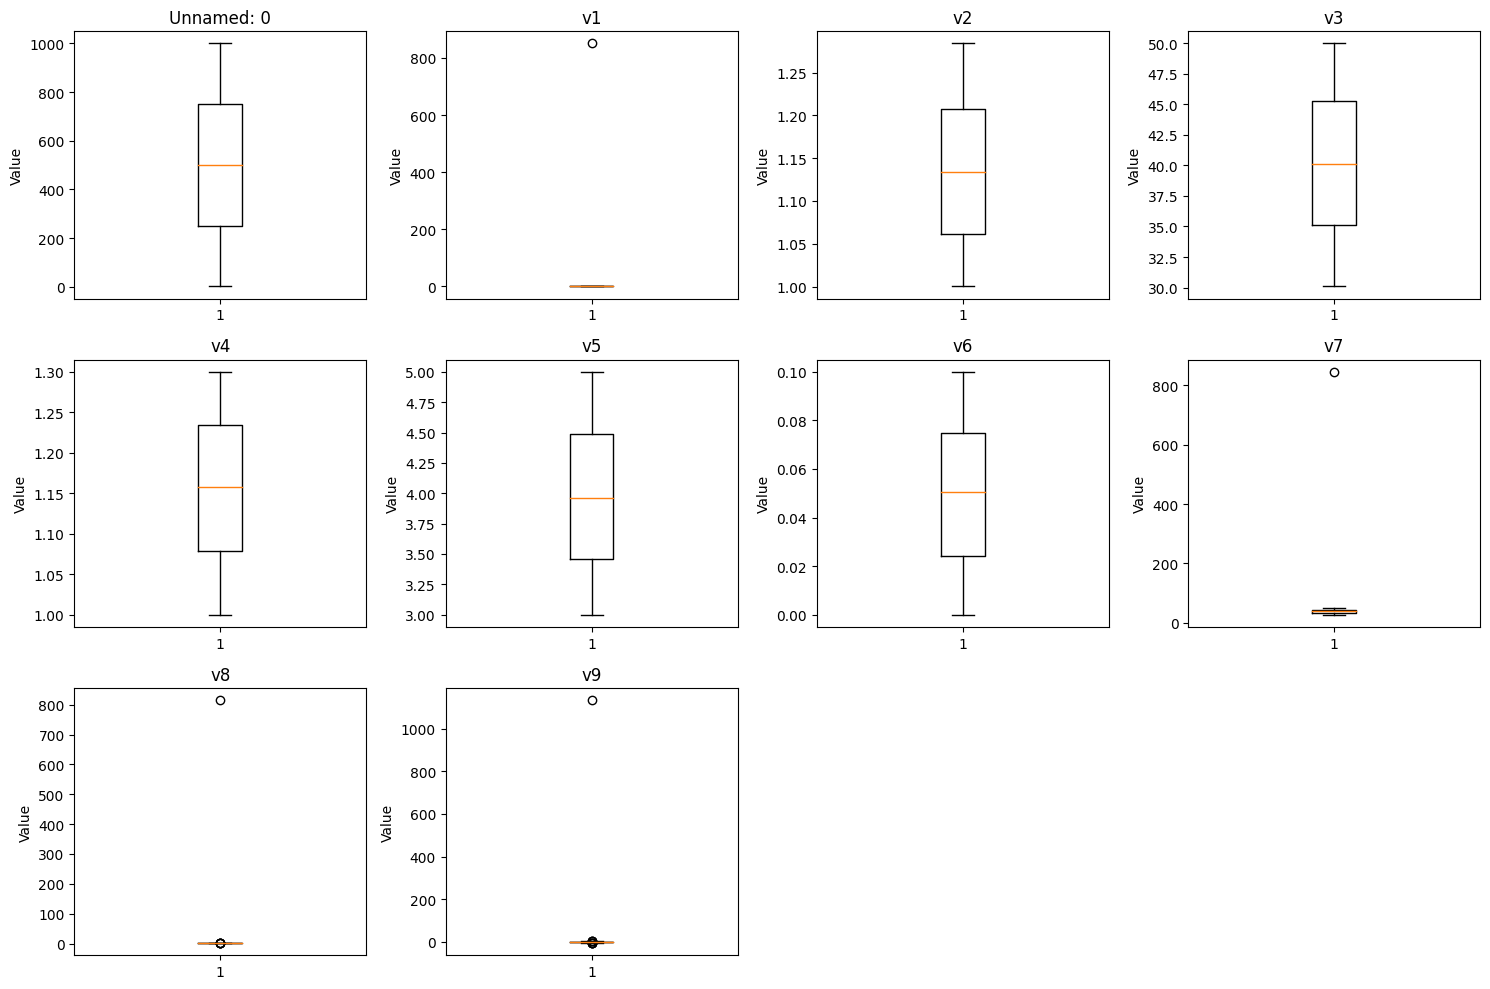

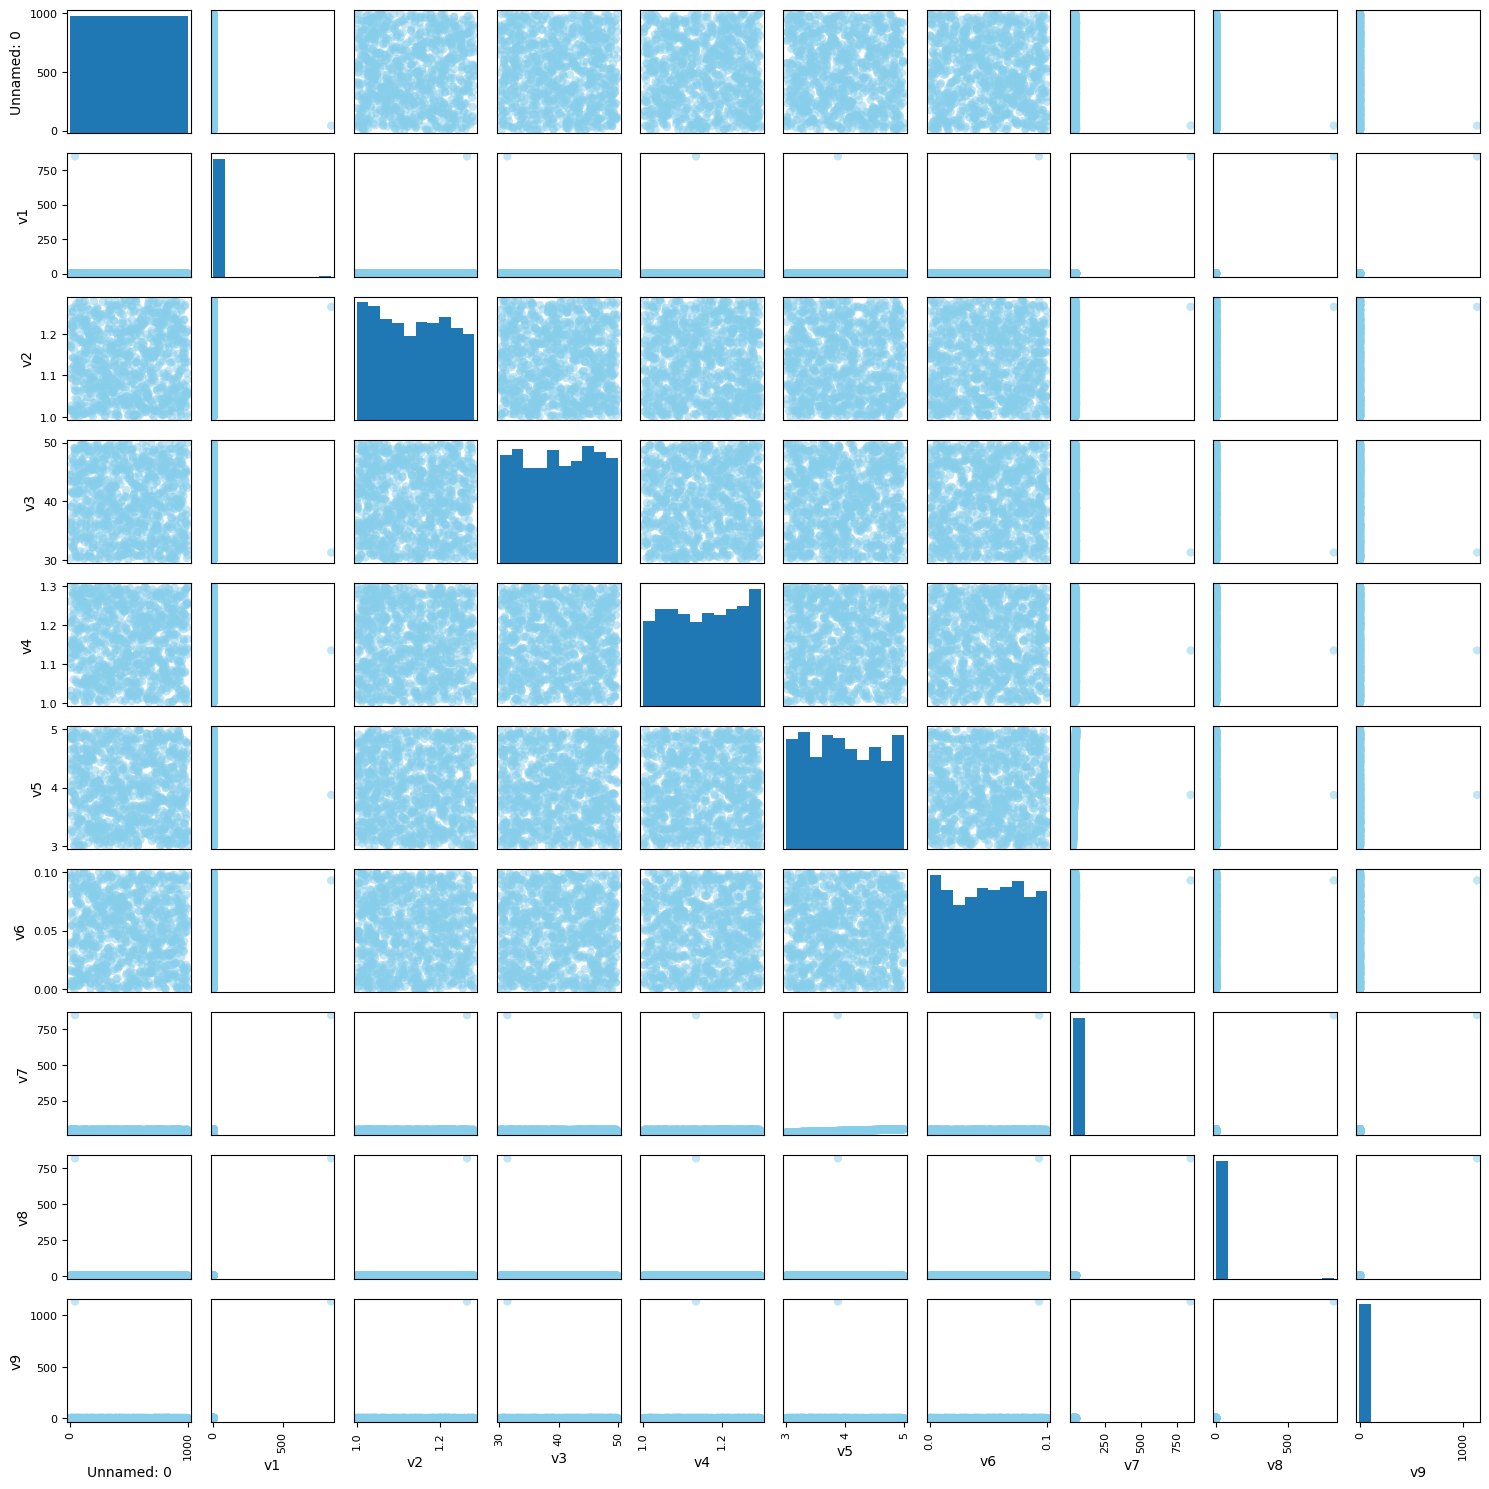

In [ ]:
# Concatenate train and test data for EDA
full_data = pd.concat([train_data, test_data], ignore_index=True)

# Summary statistics
print("\nSummary Statistics:")
print(full_data.describe())

# Histograms for each feature in the training data
plt.figure(figsize=(15, 10))
for i, col in enumerate(train_data.columns[:-1]):  # Exclude the last column (target)
    plt.subplot(3, 4, i + 1)
    plt.hist(train_data[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Boxplots for each feature in the training data
plt.figure(figsize=(15, 10))
for i, col in enumerate(train_data.columns[:-1]):  # Exclude the last column (target)
    plt.subplot(3, 4, i + 1)
    plt.boxplot(train_data[col])
    plt.title(col)
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

# Scatter plot matrix for the training data
pd.plotting.scatter_matrix(train_data.iloc[:, :-1], figsize=(15, 15), marker='o', color='skyblue')
plt.tight_layout()
plt.show()

### Feature Representation of the Train Data

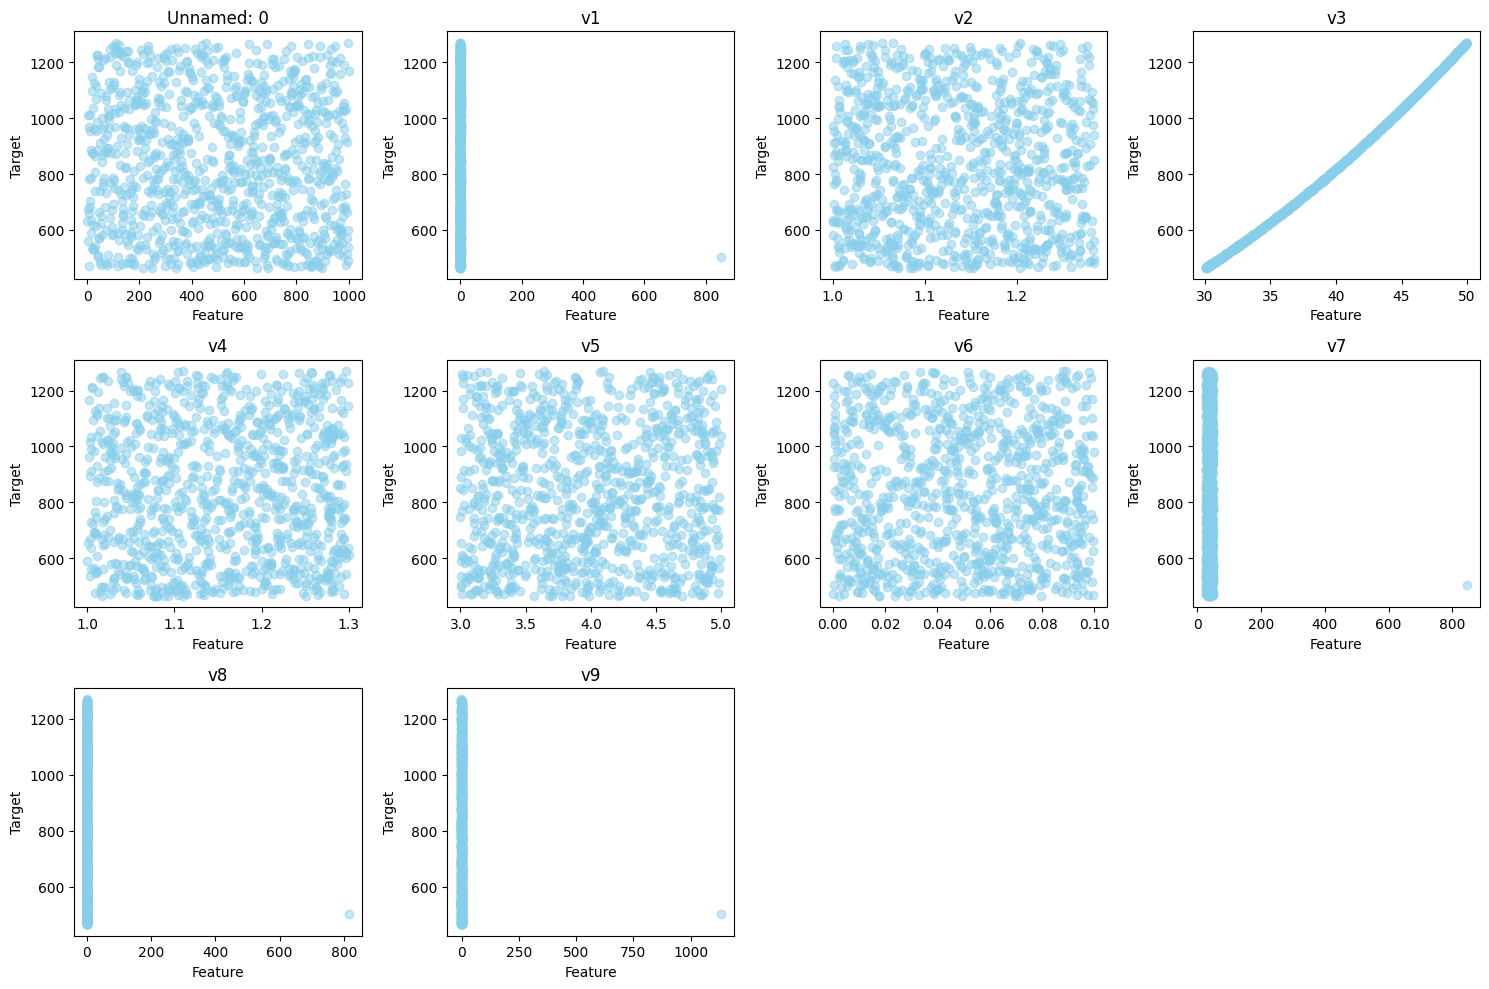

In [ ]:
# Scatter plots of each feature against the target variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(train_data.columns[:-1]):  # Exclude the last column (target)
    plt.subplot(3, 4, i + 1)
    plt.scatter(train_data[col], train_data['Y'], color='skyblue', alpha=0.5)
    plt.title(col)
    plt.xlabel('Feature')
    plt.ylabel('Target')
plt.tight_layout()
plt.show()

### Correlation Matrix

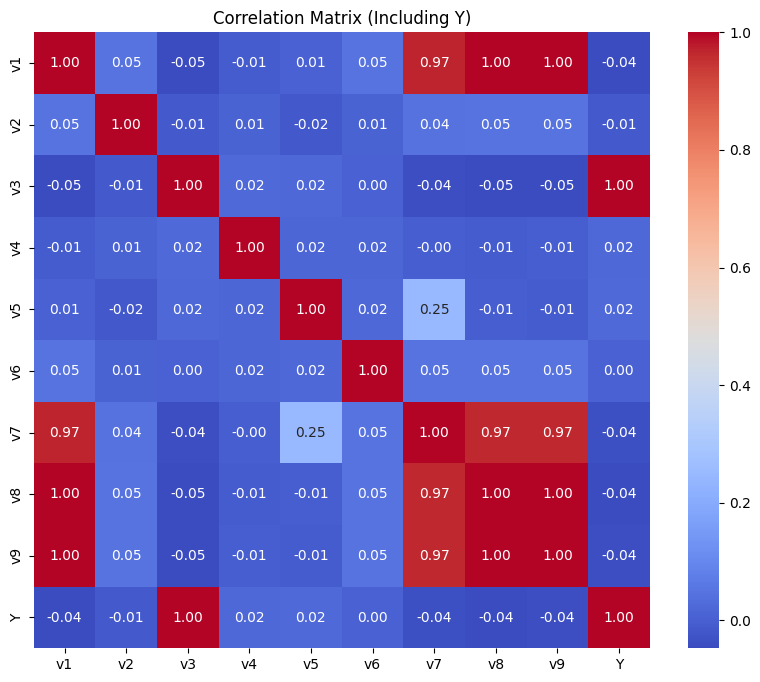

In [ ]:
# Calculate correlation matrix including Y
correlation_matrix = train_data[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'Y']].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix (Including Y)')
plt.show()

#### Multi-colinearity

In [ ]:
# Create a DataFrame with only the predictor features (v1 to v9)
predictor_features = train_data[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']]

# Calculate VIF for each predictor feature
vif_data = pd.DataFrame()
vif_data["Feature"] = predictor_features.columns
vif_data["VIF"] = [variance_inflation_factor(predictor_features.values, i) for i in range(len(predictor_features.columns))]

print(vif_data)

  Feature           VIF
0      v1  1.185933e+07
1      v2  1.889164e+02
2      v3  4.871951e+01
3      v4  1.756536e+02
4      v5  3.083863e+06
5      v6  3.931237e+00
6      v7  4.212850e+06
7      v8  5.458014e+06
8      v9  6.160419e+02


### Test Data Analysis

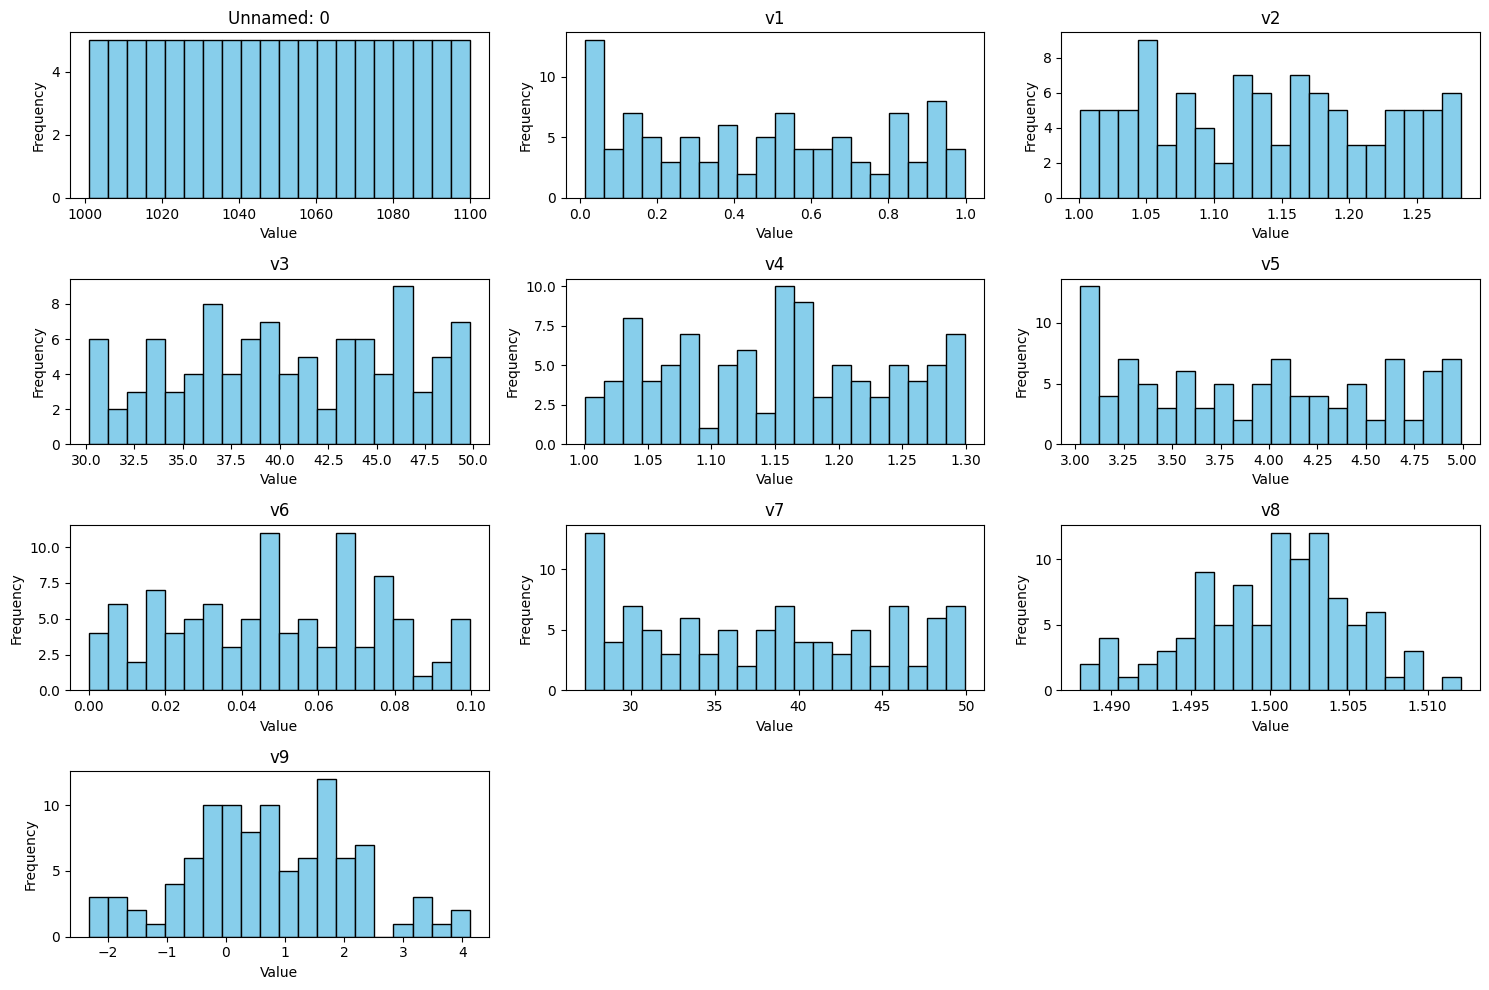

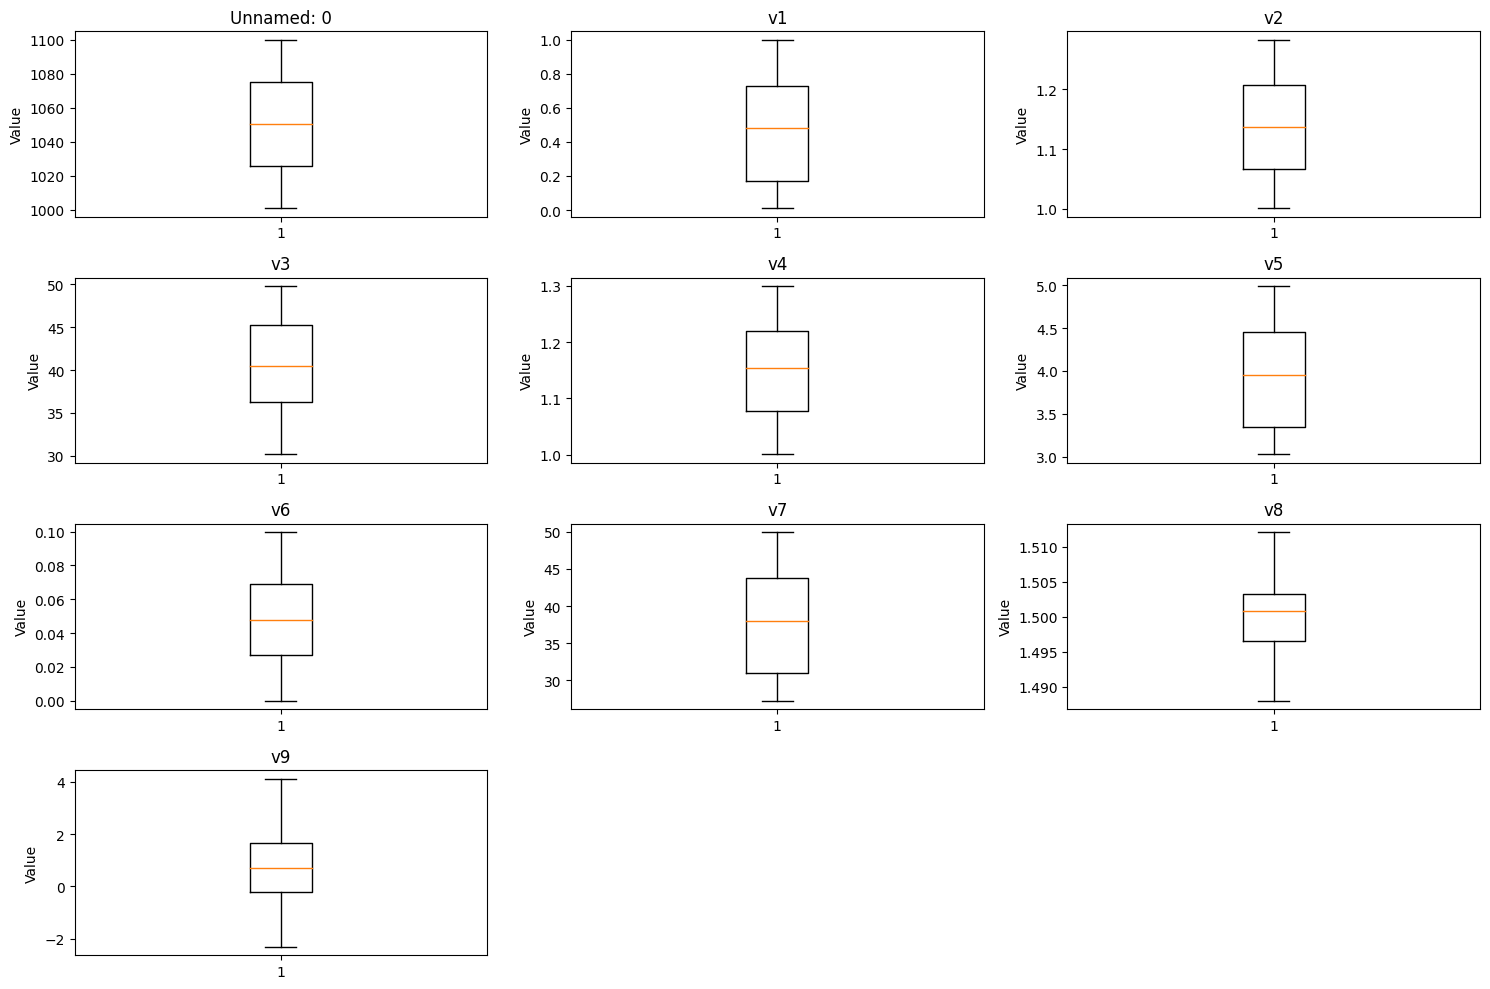

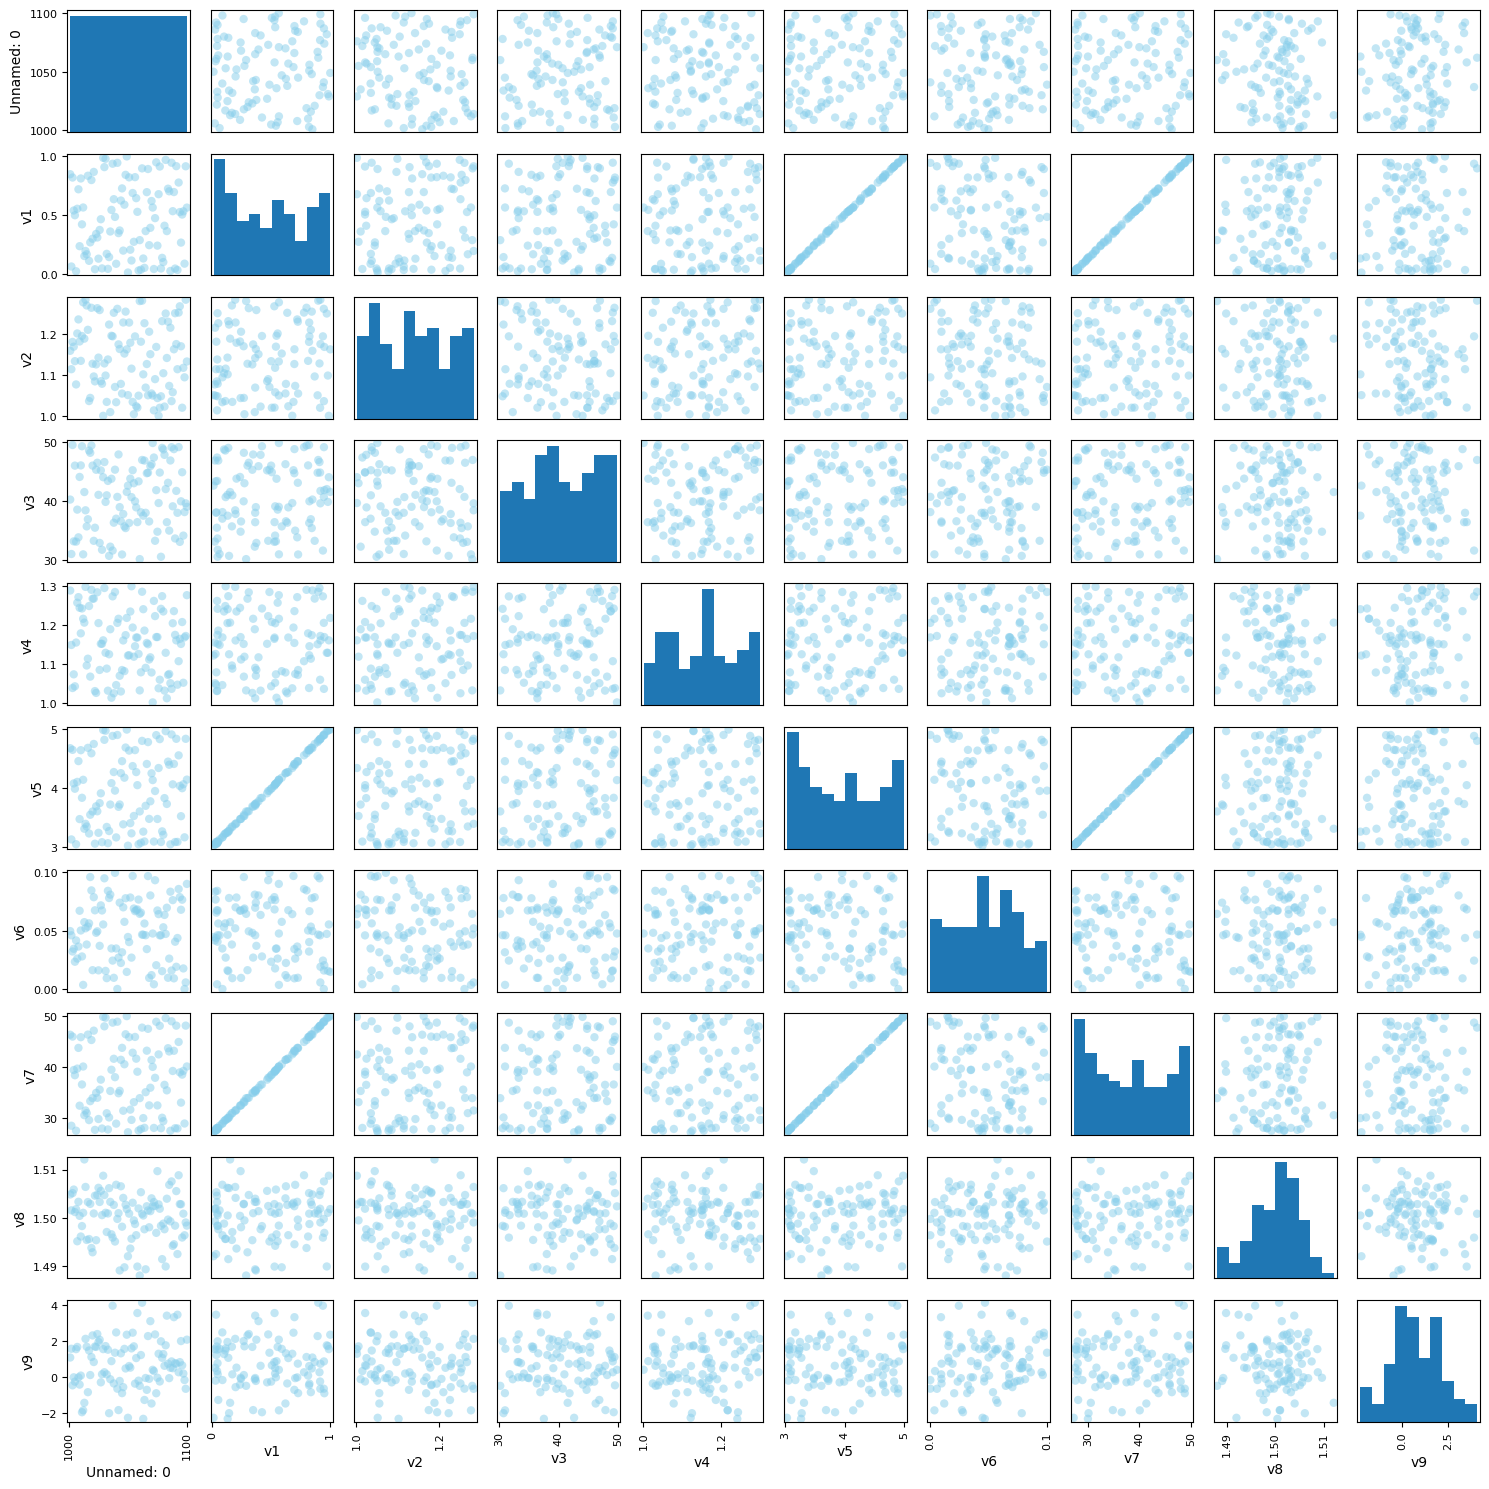

In [24]:
# Calculate the number of rows and columns for subplots
num_features = len(test_data.columns)
num_rows = (num_features - 1) // 3 + 1  # Adjust as needed based on the desired layout
num_cols = min(num_features, 3)

# Histograms for each feature in the test data
plt.figure(figsize=(15, 10))
for i, col in enumerate(test_data.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.hist(test_data[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Boxplots for each feature in the test data
plt.figure(figsize=(15, 10))
for i, col in enumerate(test_data.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.boxplot(test_data[col])
    plt.title(col)
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

# Scatter plot matrix for the test data
pd.plotting.scatter_matrix(test_data, figsize=(15, 15), marker='o', color='skyblue')
plt.tight_layout()
plt.show()

## 📈**Linear Regressio Model**

In [ ]:
# Parametric Approach (Linear Regression)

# Separate features and target variable for training data
X_train = train_data.drop(columns=['Y'])  # Features
y_train = train_data['Y']  # Target variable

# Fit the linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Evaluate the model
train_predictions_lr = linear_reg_model.predict(X_train)
train_rmse_lr = mean_squared_error(y_train, train_predictions_lr, squared=False)
print("Train RMSE (Linear Regression):", train_rmse_lr)

Train RMSE (Linear Regression): 14.80941829940588


### With Cross-validation (LOO) and feature selection

In [ ]:
# Separate features and target variable for training data
X_train = train_data[['v3']]  # Score 12.8
#X_train = train_data[['v1','v2','v3','v4','v5','v6','v7','v8','v9']]
y_train = train_data['Y']  # Target variable

# Initialize Linear Regression model
linear_reg_model = LinearRegression()

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Perform cross-validation
cv_scores_lr = cross_val_score(linear_reg_model, X_train, y_train, cv=loo, scoring='neg_mean_squared_error')

# Convert scores to positive since sklearn returns negative scores for regression metrics
cv_rmse_scores_lr = np.sqrt(-cv_scores_lr)

# Print the RMSE scores for each fold
print("Cross-Validation RMSE Scores (Linear Regression):", cv_rmse_scores_lr)

# Calculate the average RMSE across all folds
avg_cv_rmse_lr = np.mean(cv_rmse_scores_lr)
print("Average Cross-Validation RMSE (Linear Regression):", avg_cv_rmse_lr)

Cross-Validation RMSE Scores (Linear Regression): [ 3.982516    5.06284884  5.25391273  8.72867894  8.25603662  9.93542519
 15.31260344 27.28675554  5.69680821 10.18200713 11.67520074 12.2327273
 14.41999897 16.21525957  1.05020534  3.75485282 13.17878586 10.26794259
  3.44491144 15.68553884  1.22230981 17.21677657  1.60082952 16.38454765
 12.12364824 12.65251453  7.54844454 13.41435023 16.59780715 15.49201872
 11.24980538  7.88734575  0.39825198 10.92826385  4.96854675 25.84392038
 10.53548724 16.42615724 26.31061689 17.69648485 17.83556405 20.3443332
 20.73578695  6.77756357 17.06357555  6.69794905  7.25204654 25.80094698
 12.97683904 13.89586389  4.66858563 27.54898257  7.85125819  3.96117642
  9.11217815 15.58544427  3.27196167 12.19914183 16.53374589 15.95168661
 15.79856485 22.82617752 15.8063612  12.94477757 14.55491961 11.16628034
 22.21198159 27.40660702 10.0116768   0.67502401  2.8822126  15.98879812
  1.29276268 28.60034847 13.95686707 15.1898653  16.852807   15.70758353
  6

### Find the best feature combination

In [ ]:
best_rmse = float('inf')
best_features = None

# Define the features to iterate over
features_to_iterate = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']

# Loop through all possible feature combinations
for k in range(1, len(features_to_iterate) + 1):
    for feature_combination in combinations(features_to_iterate, k):
        # Separate features and target variable for training data
        X_train = train_data[list(feature_combination)]
        y_train = train_data['Y']

        # Initialize Linear Regression model
        linear_reg_model = LinearRegression()

        # Fit the model
        linear_reg_model.fit(X_train, y_train)

        # Predict on the training data
        train_predictions_lr = linear_reg_model.predict(X_train)

        # Calculate RMSE
        train_rmse_lr = mean_squared_error(y_train, train_predictions_lr, squared=False)

        # Check if this combination gives a better RMSE
        if train_rmse_lr < best_rmse:
            best_rmse = train_rmse_lr
            best_features = feature_combination

        # Print the feature combination and RMSE for each iteration
        print("Feature Combination:", feature_combination)
        print("RMSE:", train_rmse_lr)

# Print the best combination of features and the corresponding RMSE
print("Best Feature Combination:", best_features)
print("Best RMSE:", best_rmse)

Feature Combination: ('v1',)
RMSE: 235.57672869906173
Feature Combination: ('v2',)
RMSE: 235.78387444211793
Feature Combination: ('v3',)
RMSE: 14.882205043327426
Feature Combination: ('v4',)
RMSE: 235.7566196708223
Feature Combination: ('v5',)
RMSE: 235.7454761935674
Feature Combination: ('v6',)
RMSE: 235.8082965617681
Feature Combination: ('v7',)
RMSE: 235.64495789323598
Feature Combination: ('v8',)
RMSE: 235.57406314660983
Feature Combination: ('v9',)
RMSE: 235.5925158162258
Feature Combination: ('v1', 'v2')
RMSE: 235.5583231671853
Feature Combination: ('v1', 'v3')
RMSE: 14.867888794737176
Feature Combination: ('v1', 'v4')
RMSE: 235.52560454509558
Feature Combination: ('v1', 'v5')
RMSE: 235.51158502851658
Feature Combination: ('v1', 'v6')
RMSE: 235.573848594406
Feature Combination: ('v1', 'v7')
RMSE: 235.51104393622882
Feature Combination: ('v1', 'v8')
RMSE: 235.51079235092874
Feature Combination: ('v1', 'v9')
RMSE: 235.4290079324643
Feature Combination: ('v2', 'v3')
RMSE: 14.8795940

### Best case, ploynomial fit on linear regression (USED MODEL)

In [ ]:
# Separate features and target variable for training data
X_train = train_data[['v1','v2','v3','v4','v5','v6','v7','v8','v9']]
y_train = train_data['Y']  # Target variable

# Generate polynomial features
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)

# Fit the linear regression model with polynomial features
linear_reg_model_poly = LinearRegression()
linear_reg_model_poly.fit(X_train_poly, y_train)

# Evaluate the model
train_predictions_lr_poly = linear_reg_model_poly.predict(X_train_poly)
train_rmse_lr_poly = mean_squared_error(y_train, train_predictions_lr_poly, squared=False)
print("Train RMSE (Linear Regression with Polynomial Features):", train_rmse_lr_poly)

Train RMSE (Linear Regression with Polynomial Features): 0.001014625507487201


## 🤖**KNN Model**

In [ ]:
# Separate features and target variable for training data
X_train = train_data[['v1', 'v2', 'v3', 'v4', 'v5', 'v6','v7', 'v8','v9']]  # Features
y_train = train_data['Y']  # Target variable

# Instantiate KNN regressor with default parameters
knn_model = KNeighborsRegressor()

# Fit the KNN model
knn_model.fit(X_train, y_train)

# Evaluate the model
train_predictions_knn = knn_model.predict(X_train)
train_rmse_knn = mean_squared_error(y_train, train_predictions_knn, squared=False)
print("Train RMSE (KNN):", train_rmse_knn)

Train RMSE (KNN): 16.862812869178864


### Fine tuning (Overfitting Discard)

In [ ]:
# Separate features and target variable for training data
X_train = train_data[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']]
y_train = train_data['Y']

# Define KNN regressor
knn_model = KNeighborsRegressor()

# Define parameter grid for grid search
param_grid = {
    'n_neighbors': range(1, 21),  # Range of k values
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan'],  # Distance metric
    'leaf_size': [10, 20, 30, 40, 50],  # Leaf size
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm for computing neighbors
}

# Initialize K-Fold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store best RMSE and corresponding model
best_rmse = float('inf')
best_model = None
best_params = None

# Perform grid search with cross-validation disregard rmse = 0 to evade overfitting
for n_neighbors in param_grid['n_neighbors']:
    for weights in param_grid['weights']:
        for metric in param_grid['metric']:
            for leaf_size in param_grid['leaf_size']:
                for algorithm in param_grid['algorithm']:
                    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, metric=metric,
                                                    leaf_size=leaf_size, algorithm=algorithm)
                    rmse_values = []
                    for train_index, val_index in kf.split(X_train):
                        X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
                        y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
                        knn_model.fit(X_train_cv, y_train_cv)
                        val_predictions = knn_model.predict(X_val_cv)
                        val_rmse = mean_squared_error(y_val_cv, val_predictions, squared=False)
                        rmse_values.append(val_rmse)
                    avg_rmse = np.mean(rmse_values)
                    if avg_rmse > 0 and avg_rmse < best_rmse:
                        best_rmse = avg_rmse
                        best_model = knn_model
                        best_params = {
                            'n_neighbors': n_neighbors,
                            'weights': weights,
                            'metric': metric,
                            'leaf_size': leaf_size,
                            'algorithm': algorithm
                        }

# Print the best parameters and corresponding RMSE
print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)

# Fit the best KNN model
best_model.fit(X_train, y_train)

# Evaluate the model
train_predictions_knn = best_model.predict(X_train)
train_rmse_knn = mean_squared_error(y_train, train_predictions_knn, squared=False)
print("Train RMSE (Best KNN Model):", train_rmse_knn)

### Leave-one-out Cross-validation

In [ ]:
# Define the parameters for KNN
knn_params = {'n_neighbors': 9, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 10, 'algorithm': 'auto'}

# Initialize KNN model with specified parameters
knn_model = KNeighborsRegressor(**knn_params)

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Perform cross-validation
cv_scores = cross_val_score(knn_model, X_train, y_train, cv=loo, scoring='neg_mean_squared_error')

# Convert scores to positive since sklearn returns negative scores for regression metrics
cv_rmse_scores = np.sqrt(-cv_scores)

# Print the RMSE scores for each fold
print("Cross-Validation RMSE Scores:", cv_rmse_scores)

# Calculate the average RMSE across all folds
avg_cv_rmse = np.mean(cv_rmse_scores)
print("Average Cross-Validation RMSE:", avg_cv_rmse)

### Using Feature Selection

In [ ]:
# Define a function to calculate RMSE for a given set of features using cross-validation
def calculate_rmse_cv(features):
    X_train_selected = X_train[list(features)]
    rmse_values = []
    for train_index, val_index in kf.split(X_train_selected):
        X_train_cv, X_val_cv = X_train_selected.iloc[train_index], X_train_selected.iloc[val_index]
        y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
        knn_model.fit(X_train_cv, y_train_cv)
        val_predictions = knn_model.predict(X_val_cv)
        val_rmse = mean_squared_error(y_val_cv, val_predictions, squared=False)
        rmse_values.append(val_rmse)
    return np.mean(rmse_values)

# Initialize variables to store best RMSE and corresponding feature set
best_rmse = float('inf')
best_feature_set = None

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Try all possible combinations of features
for r in range(1, len(X_train.columns) + 1):
    for feature_combination in combinations(X_train.columns, r):
        rmse = calculate_rmse_cv(feature_combination)
        if rmse < 5:
            print("Feature Set:", feature_combination)
            print("RMSE:", rmse)
            # Update best_rmse and best_feature_set if a better combination is found
            if rmse < best_rmse:
                best_rmse = rmse
                best_feature_set = feature_combination

# Print the best feature set and corresponding RMSE
print("Best Feature Set:", best_feature_set)
print("Best RMSE:", best_rmse)

### Finetuning, Cross Validating (LOO) and Feature Selection (USED MODEL)

In [25]:
# Select only the specified features
# selected_features = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v8']
selected_features = ['v3', 'v6']
X_train_selected = X_train[selected_features]

# Define the parameters for KNN
knn_params = {'n_neighbors': 9, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 10, 'algorithm': 'auto'}

# Initialize KNN model with specified parameters
knn_model = KNeighborsRegressor(**knn_params)

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Perform cross-validation
cv_scores = cross_val_score(knn_model, X_train_selected, y_train, cv=loo, scoring='neg_mean_squared_error')

# Convert scores to positive since sklearn returns negative scores for regression metrics
cv_rmse_scores = np.sqrt(-cv_scores)

# Print the RMSE scores for each fold
# print("Cross-Validation RMSE Scores:", cv_rmse_scores)

# Calculate the average RMSE across all folds
avg_cv_rmse = np.mean(cv_rmse_scores)
print("Average Cross-Validation RMSE:", avg_cv_rmse)

Average Cross-Validation RMSE: 1.1848249419041548


## 🔍**Diagnostic tests on Data**

### Linear regression

#### Correlation of Error Terms & Heteroscedasticity


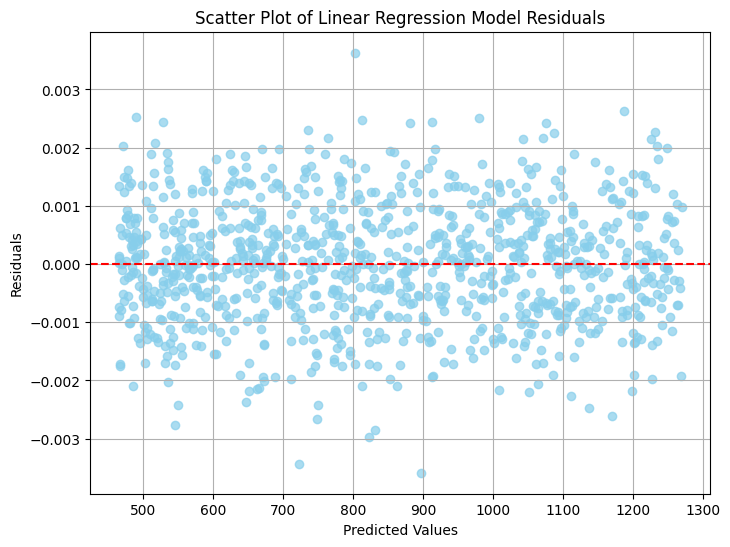

In [ ]:
# Separate features and target variable for training data
X_train = train_data[['v1','v2','v3','v4','v5','v6','v7','v8','v9']]
y_train = train_data['Y']  # Target variable

# Generate polynomial features
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)

# Fit the linear regression model with polynomial features
linear_reg_model_poly = LinearRegression()
linear_reg_model_poly.fit(X_train_poly, y_train)

# Evaluate the model
train_predictions_lr_poly = linear_reg_model_poly.predict(X_train_poly)
train_residuals_lr_poly = y_train - train_predictions_lr_poly

# Plot scatter plot of residuals
plt.figure(figsize=(8, 6))
plt.scatter(train_predictions_lr_poly, train_residuals_lr_poly, color='skyblue', alpha=0.7)
plt.title('Scatter Plot of Linear Regression Model Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at y=0 for reference
plt.grid(True)
plt.show()

#### Collinearity/multicollinearity of predictors

In [ ]:
# Calculate VIF for each predictor feature
vif_data_poly = pd.DataFrame()
vif_data_poly["Feature"] = poly.get_feature_names_out(X_train.columns)

vif_values = []
for i in range(X_train_poly.shape[1]):
    try:
        vif = variance_inflation_factor(X_train_poly, i)
        vif_values.append(vif)
    except Exception as e:
        vif_values.append(np.inf)  # Assign infinite VIF for features with division by zero

vif_data_poly["VIF"] = vif_values

print(vif_data_poly)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


       Feature           VIF
0            1  0.000000e+00
1           v1  3.304667e+11
2           v2  3.909896e+04
3           v3  6.330711e+02
4           v4  4.253008e+02
..         ...           ...
710       v8^4           inf
711    v8^3 v9           inf
712  v8^2 v9^2           inf
713    v8 v9^3           inf
714       v9^4           inf

[715 rows x 2 columns]


In [ ]:
# Filter the VIF table to show values greater than 5
high_vif_values = vif_data_poly[vif_data_poly["VIF"] > 5]
print(high_vif_values)

       Feature           VIF
1           v1  3.304667e+11
2           v2  3.909896e+04
3           v3  6.330711e+02
4           v4  4.253008e+02
5           v5  1.791055e+04
..         ...           ...
710       v8^4           inf
711    v8^3 v9           inf
712  v8^2 v9^2           inf
713    v8 v9^3           inf
714       v9^4           inf

[714 rows x 2 columns]


#### Presence of a single interaction term

In [ ]:
# Create polynomial features including interaction terms
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_train_interaction = poly.fit_transform(X_train_selected)

# Fit the linear regression model with interaction terms
linear_reg_model_interaction = LinearRegression()
linear_reg_model_interaction.fit(X_train_interaction, y_train)

# Print coefficients and assess significance
print("Coefficients of the linear regression model with interaction terms:")
print(linear_reg_model_interaction.coef_)

Coefficients of the linear regression model with interaction terms:
[ 4.04605864e+01 -1.33081387e+01 -2.10172594e-02]


### KNN

#### Correlation of error terms and heteroscedasticity

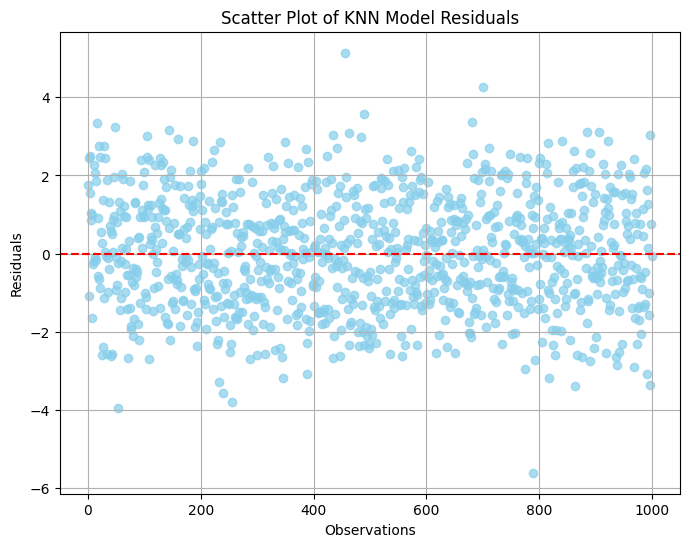

In [ ]:
# Select only the specified features
selected_features = ['v3', 'v6']
X_train_selected = X_train[selected_features]

# Define the parameters for KNN
knn_params = {'n_neighbors': 9, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 10, 'algorithm': 'auto'}

# Initialize KNN model with specified parameters
knn_model = KNeighborsRegressor(**knn_params)

# Perform cross-validation to get predictions
loo = LeaveOneOut()
knn_cv_predictions = cross_val_predict(knn_model, X_train_selected, y_train, cv=loo)

# Calculate residuals for the KNN model
knn_residuals = y_train - knn_cv_predictions

# Plot scatter plot of residuals
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(y_train)), knn_residuals, color='skyblue', alpha=0.7)
plt.title('Scatter Plot of KNN Model Residuals')
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at y=0 for reference
plt.grid(True)
plt.show()


#### Collinearity/multicollinearity of predictors

In [ ]:
# Compute pairwise correlations between predictors
correlation_matrix = X_train_selected.corr()

# Print correlation matrix
print("Pairwise Correlation Matrix between Predictors:")
print(correlation_matrix)

# Find pairs with correlations greater than a threshold (e.g., 0.5)
high_correlation_pairs = (correlation_matrix.abs() > 0.5) & (correlation_matrix.abs() < 1)

# Print pairs with high correlations
print("\nPairs with Correlation > 0.5:")
for i in range(len(high_correlation_pairs.columns)):
    for j in range(i+1, len(high_correlation_pairs.columns)):
        if high_correlation_pairs.iloc[i, j]:
            print(high_correlation_pairs.columns[i], "-", high_correlation_pairs.columns[j])


Pairwise Correlation Matrix between Predictors:
          v3        v6
v3  1.000000  0.004612
v6  0.004612  1.000000

Pairs with Correlation > 0.5:


#### Presence of a single interaction term

In [ ]:
# Define the selected features
selected_features = ['v3', 'v6']
X_train_selected = X_train[selected_features]

# Define the parameters for KNN
knn_params = {'n_neighbors': 9, 'weights': 'distance', 'leaf_size': 10, 'algorithm': 'auto'}

# Define a list of distance metrics to experiment with
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Initialize an empty dictionary to store results
results = {}

# Loop through each distance metric
for metric in distance_metrics:
    # Update the distance metric parameter in the KNN parameters
    knn_params['metric'] = metric

    # Initialize KNN model with the specified parameters
    knn_model = KNeighborsRegressor(**knn_params)

    # Perform cross-validation
    cv_scores = cross_val_score(knn_model, X_train_selected, y_train, cv=loo, scoring='neg_mean_squared_error')

    # Convert scores to positive since sklearn returns negative scores for regression metrics
    cv_rmse_scores = np.sqrt(-cv_scores)

    # Calculate the average RMSE across all folds
    avg_cv_rmse = np.mean(cv_rmse_scores)

    # Store the average RMSE for the current distance metric
    results[metric] = avg_cv_rmse

# Print the results
print("Average Cross-Validation RMSE for Different Distance Metrics:")
for metric, avg_rmse in results.items():
    print(f"{metric}: {avg_rmse}")


Average Cross-Validation RMSE for Different Distance Metrics:
euclidean: 1.1937514578647075
manhattan: 1.1848249419041548
chebyshev: 1.1868428279820138


## 📝**Evaluations**

### KNN regression evaluation

In [ ]:
# Initialize KNN model with specified parameters
knn_model = KNeighborsRegressor(**knn_params)

# Fit the KNN model on the entire training data
knn_model.fit(X_train_selected, y_train)

# Select the specified features from the test data
X_test_selected = test_data[['v3', 'v6']]

# Make predictions on the test data using the trained KNN model
test_predictions_knn = knn_model.predict(X_test_selected)

# Inspect the predictions
print("Test Predictions (KNN):", test_predictions_knn)

Test Predictions (KNN): [ 825.79765411  491.86021344 1246.06714088  562.68113902 1076.52760553
  560.46379446  758.44727782  584.30555091  987.54549466 1078.17850137
 1233.59985681  490.04729341  877.40772999  752.94480394  650.56226812
  695.71581853 1199.36006201 1181.37236486 1241.57050802 1077.13103716
  564.9822832   642.98116728 1044.90067614 1099.07386098  856.93684101
  553.45264275 1039.96015599  515.21199449  986.27121185 1103.67448576
  810.22169087  853.52465132  960.40414991  483.00505607  533.64025342
  975.19690378  512.49189291  672.67916117 1044.70649354  698.96302492
  843.85758941 1166.94850082  774.43826066  683.98149045  489.88104574
  728.6861125   650.33964477  641.23529867  877.80018268  924.69071707
  671.57406782  976.0593191   843.1997836  1040.44925977  941.83678567
  813.20744236  772.99136335  677.05498216  956.19936549  465.71387942
  740.71930567 1121.8133811   718.7714692  1115.29371495  737.3710092
 1016.1625896  1021.51026765  682.98473429 1072.537462

### Linear regression evaluation`

In [ ]:
# Separate features for test data
X_test = test_data[['v1','v2','v3','v4','v5','v6','v7','v8','v9']]

# Generate polynomial features for test data
X_test_poly = poly.transform(X_test)  # Use the same PolynomialFeatures object as for training data

# Make predictions on test data
test_predictions_lr_poly = linear_reg_model_poly.predict(X_test_poly)

# Print the predictions
print("Test Predictions (Linear Regression with Polynomial Features):", test_predictions_lr_poly)

Test Predictions (Linear Regression with Polynomial Features): [ 827.34143408  491.20830002 1245.98247438  562.9217303  1076.18600925
  559.08319601  758.09201222  586.80601798  988.23424602 1079.33509944
 1233.80508589  491.303201    877.134612    752.39743926  649.97408953
  697.24793204 1196.84476298 1178.78969355 1242.01423816 1075.65274601
  567.3834526   641.24353247 1043.3892115  1098.44027405  856.95363304
  553.51883237 1039.13068077  514.04052336  988.99298217 1106.39646226
  811.4953778   853.78318617  957.68269681  481.84244999  532.39584668
  975.73973131  513.22621361  674.40688864 1044.76575383  697.52092669
  846.04318652 1165.17917835  774.17742654  683.33900968  491.17147127
  728.18810081  651.5671436   642.54528223  881.1379363   922.55376895
  673.54172626  975.39377356  841.15562956 1041.45349727  941.32309858
  815.35452742  773.28799335  677.61656818  954.10625835  465.4684741
  738.71856109 1123.05461263  716.82123319 1114.92257826  736.54769739
 1018.06205109 

### Results visualization

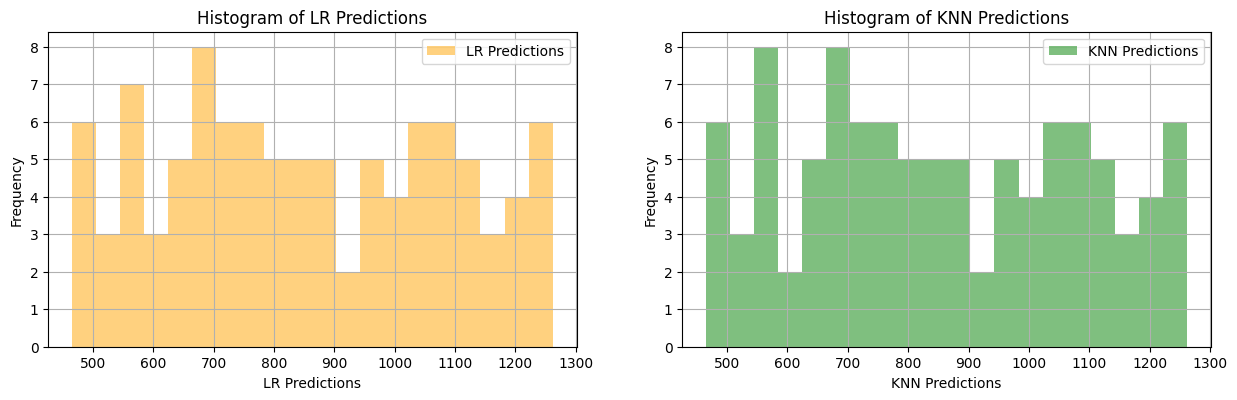

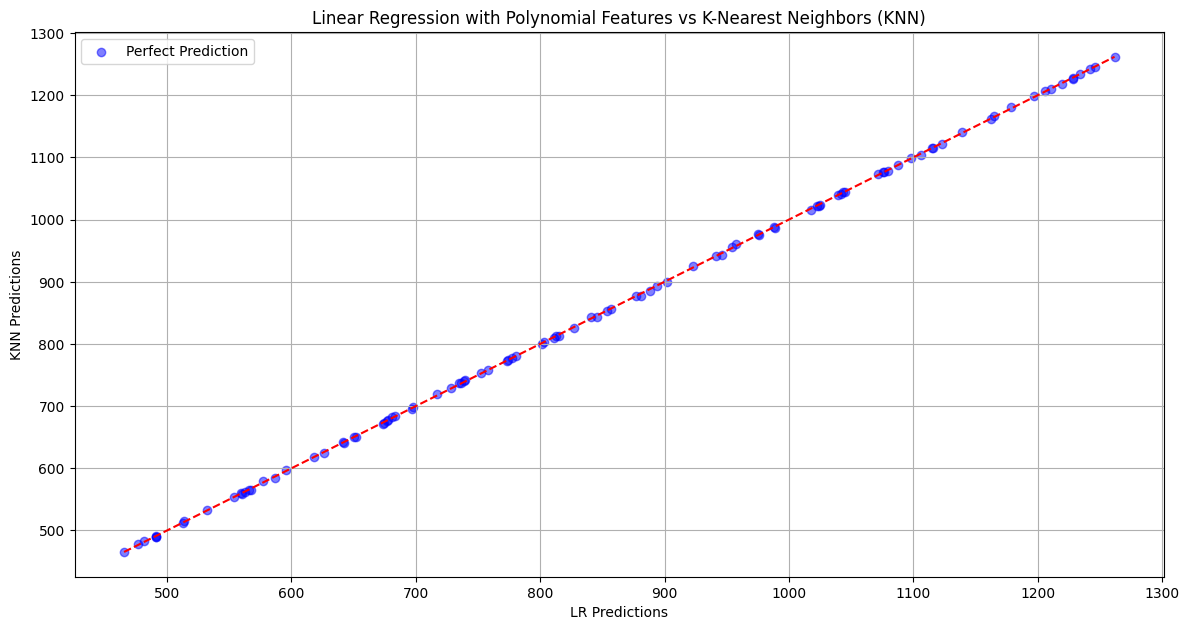

In [ ]:
# Calculate bin edges
bin_edges_lr = np.histogram_bin_edges(test_predictions_lr_poly, bins=20)
bin_edges_knn = np.histogram_bin_edges(test_predictions_knn, bins=20)

# Plotting the results
plt.figure(figsize=(15, 9))

# Histogram for LR predictions
plt.subplot(2, 2, 1)
plt.hist(test_predictions_lr_poly, bins=bin_edges_lr, color='orange', alpha=0.5, label='LR Predictions')
plt.title('Histogram of LR Predictions')
plt.xlabel('LR Predictions')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

# Histogram for KNN predictions
plt.subplot(2, 2, 2)
plt.hist(test_predictions_knn, bins=bin_edges_knn, color='green', alpha=0.5, label='KNN Predictions')
plt.title('Histogram of KNN Predictions')
plt.xlabel('KNN Predictions')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

# Plotting the results
plt.figure(figsize=(12, 12))

# Scatter plot for LR predictions vs KNN predictions
plt.subplot(2, 1, 2)
plt.scatter(test_predictions_lr_poly, test_predictions_knn, color='blue', label='LR vs KNN Predictions', alpha=0.5)
plt.plot([test_predictions_lr_poly.min(), test_predictions_lr_poly.max()], [test_predictions_lr_poly.min(), test_predictions_lr_poly.max()], color='red', linestyle='--')
plt.title('Linear Regression with Polynomial Features vs K-Nearest Neighbors (KNN)')
plt.xlabel('LR Predictions')
plt.ylabel('KNN Predictions')
plt.grid(True)
plt.legend(['Perfect Prediction'])

plt.tight_layout()
plt.show()

## 💾***Save into 0081920_Sleiman_chal1.csv***

In [ ]:
# Create a DataFrame with the predictions
predictions_df = pd.DataFrame({
    'Linear Regression Predictions': test_predictions_lr_poly,
    'KNN Predictions': test_predictions_knn
})

# Save the DataFrame to a CSV file without including the index
predictions_df.to_csv('0081920_Sleiman_chal1.csv', index=False, header=False)

print(predictions_df)